**Student**: Marco Defilippi 

**Class**: MIT-ADSP

**Project**: Elective Project

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Importing the necessary libraries**

In [1]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


**Let us check the version of tensorflow.**

In [2]:
# print the version of tensorflow
print('TensorFlow version: ',tf.__version__)

TensorFlow version:  2.16.1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [3]:
# Load the .h5 file
with h5py.File('SVHN_single_grey1.h5', 'r') as file:

    X_train = file['X_train'][:]
    y_train = file['y_train'][:]

    X_test = file['X_test'][:]
    y_test = file['y_test'][:]


**Observations**

X_train and y_train are the training data

X_test and y_test are the testing data

Check the number of images in the training and the testing dataset.

In [4]:
print('Size Training dataset:',len(X_train), '\nSize Testing dataset:',len(X_test)) 

Size Training dataset: 42000 
Size Testing dataset: 18000


**Observation:**

The number of image in the training dataset is 42000.

The number of images in the test dataset is 18000

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use y_train to print the first 10 labels.

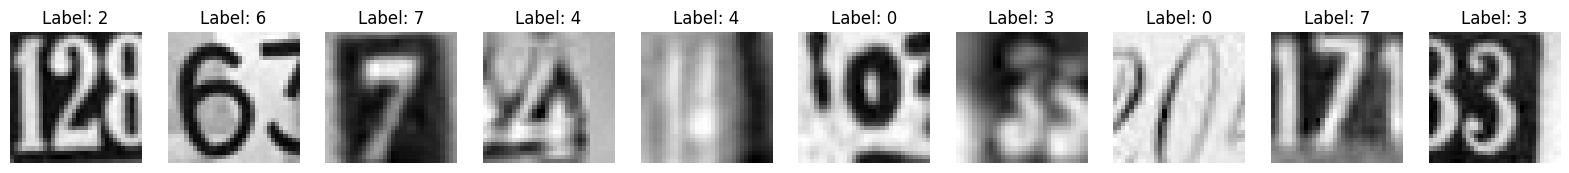

In [5]:
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(20, 2)) # Adjust figsize as needed

for i in range(num_images):
    ax = axes[i]
    ax.imshow(X_train[i], cmap='gray') # Use cmap='gray' if the images are in grayscale, otherwise remove it
    ax.title.set_text('Label: {}'.format(y_train[i]))
    ax.axis('off')

plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [6]:
# Print the shape of the first image
print("Shape of the first image:", X_train[0].shape)

# Print the array of pixels for the first image
print("Array of pixels for the first image:\n", X_train[0])

Shape of the first image: (32, 32)
Array of pixels for the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [7]:
# Normalize the datasets by dividing by 255
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

# Verify normalization by checking the max value in the normalized arrays
max_value_train_normalized = X_train_normalized.max()
max_value_test_normalized = X_test_normalized.max()

max_value_train_normalized, max_value_test_normalized

(0.9999, 0.9999)

Print the shapes of Training and Test data

In [8]:
print('Training set:', X_train_normalized.shape, y_train.shape)

print('Test set:', X_test_normalized.shape, y_test.shape)

Training set: (42000, 32, 32) (42000,)
Test set: (18000, 32, 32) (18000,)


### **One-hot encode output**

In [9]:
# One-hot encode output

y_train_encoded = to_categorical(y_train)

y_test_encoded = to_categorical(y_test)

# Test labels

# Check the shape of the encoded target variables to verify

print('Encoded y train set:', y_train_encoded.shape)
print('Encoded y test set:', y_test_encoded.shape)

Encoded y train set: (42000, 10)
Encoded y test set: (18000, 10)


In [10]:
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**

Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [11]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [12]:
# Adjusting the input shape of our data to fit the model
X_train_norm_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_norm_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

In [13]:
X_test_norm_flattened.shape

(18000, 1024)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [14]:
# Define the model 1

def nn_model_1():

    model = Sequential([
        Input(shape=(1024,)),              # input shape (1024,) 
        Dense(64, activation='relu'),      # First hidden layer with 64 nodes and relu activation 
        Dense(32, activation='relu'),      # Second hidden layer with 32 nodes and relu activation 
        Dense(10, activation='softmax')    # Output layer with softmax activation and 10 nodes   
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [15]:

# Call the function to create the model
model_1 = nn_model_1()

# Print the model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Fit the model on the training data
history = model_1.fit(X_train_norm_flattened, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1088 - loss: 2.3082 - val_accuracy: 0.1744 - val_loss: 2.2324
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2135 - loss: 2.1556 - val_accuracy: 0.3065 - val_loss: 1.9386
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3158 - loss: 1.9163 - val_accuracy: 0.3844 - val_loss: 1.7687
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4275 - loss: 1.6879 - val_accuracy: 0.5104 - val_loss: 1.4999
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5228 - loss: 1.4552 - val_accuracy: 0.5569 - val_loss: 1.3691
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5639 - loss: 1.3513 - val_accuracy: 0.5810 - val_loss: 1.3067
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5868 - loss: 1.2883 - val_accuracy: 0.6051 - val_loss: 1.2538
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6077 - loss: 1.2406 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

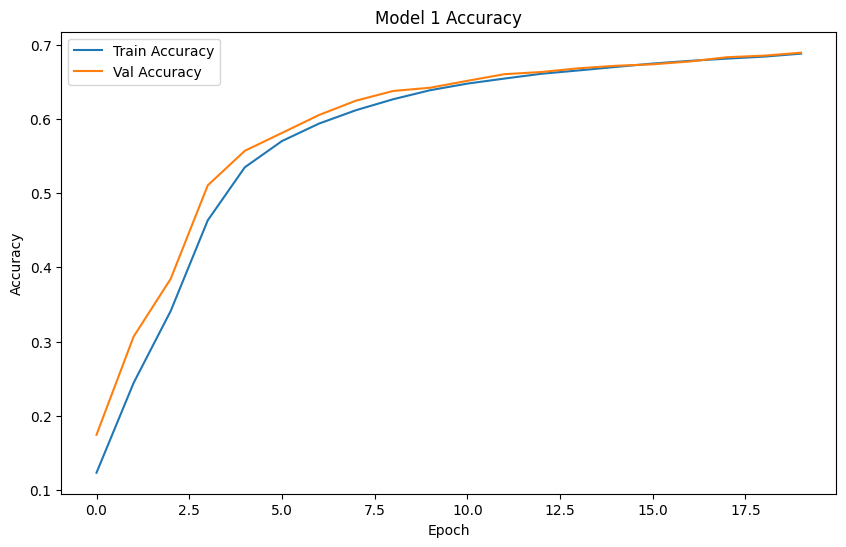

In [22]:
# Plotting the accuracies for model 1 

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Observations:**

Observing the plot, both the training and validation accuracies improve over time, indicating that the model is learning effectively from the data. The two accuracies converge and move closely together. There is no gap between them, therefore I can conclude there is no overfitting and the model is generalizing well to the validation data. 
In addition, the two curves are quite smooht, indicating that the learning rate is likely set at an appropriate level and that the model is training stably. 
At the end of the plot, both curves are starting to plateau, indicating that the model may not significanlty benefit from further training with the current data and model architecture. 
Concluding, both accuracies have not reached a very high value, both settled around 68%, further improvements could be achieved through hyperparameter tuning or using a more complex model. 

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
# Clearing backend

from tensorflow.python.keras import backend

backend.clear_session()

In [19]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [20]:

# Function to create the model
def nn_model_2():
    model = Sequential()
    model.add(Input(shape=(1024,))),           # input shape (1024,) 
    model.add(Dense(256, activation='relu'))   # First hidden layer with 256 nodes and relu activation 
    model.add(Dense(128, activation='relu'))   # Second hidden layer with 128 nodes and relu activation
    model.add(Dropout(0.2))                    # Dropout layer with rate 0.2
    model.add(Dense(64, activation='relu'))    # Third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))    # Fourth hidden layer with 64 nodes and relu activation
    model.add(Dense(32, activation='relu'))    # Fifth hidden layer with 32 nodes and relu activation
    model.add(BatchNormalization())            # BatchNormalization layer
    model.add(Dense(10, activation='softmax')) # Output layer with softmax activation and 10 nodes

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])
    return model


# Call the model function and store the model in 'model_2'' variable
model_2 = nn_model_2()

# Print the model summary
model_2.summary()

# Fit the model on the training data
# Note that X_train_norm_flattened is normalized and reshaped
# y_train is one-hot encoded
history_2 = model_2.fit(X_train_norm_flattened, y_train_encoded,
                        validation_split=0.2, batch_size=128, verbose=1, epochs=30)

# The history_2 variable now contains the history of the training fro model_2, which includes the training and validation accuracies.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1010 - loss: 2.4740 - val_accuracy: 0.0970 - val_loss: 2.3349
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1083 - loss: 2.3072 - val_accuracy: 0.1667 - val_loss: 2.2618
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2388 - loss: 2.0859 - val_accuracy: 0.3919 - val_loss: 1.7491
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4523 - loss: 1.6091 - val_accuracy: 0.5561 - val_loss: 1.3564
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5680 - loss: 1.3220 - val_accuracy: 0.6358 - val_loss: 1.1408
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6171 - loss: 1.1840 - val_accuracy: 0.6487 - val_loss: 1.0969
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6424 - loss: 1.1063 - val_accuracy: 0.6750 - val_loss: 1.0272
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6684 - loss: 1.0390 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

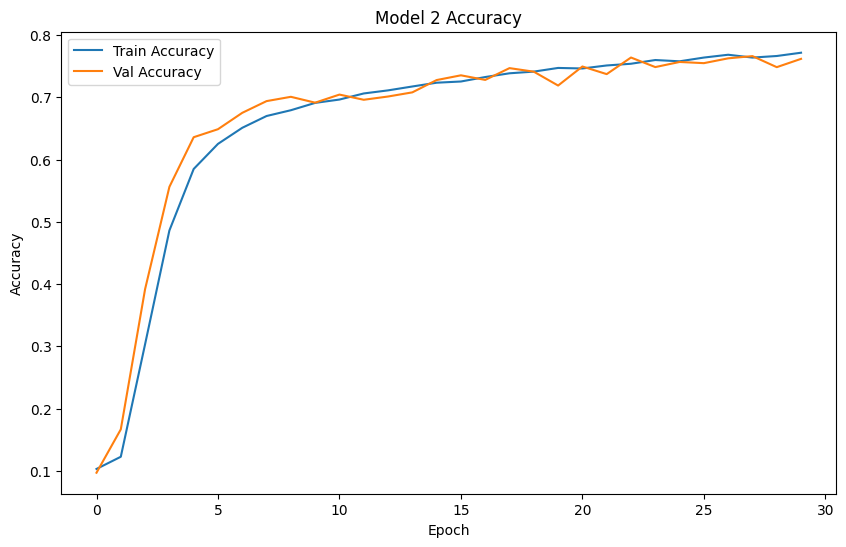

In [23]:
# Plotting the accuracies for model 2 

plt.figure(figsize=(10, 6))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Observations:**

Both the training and validation accuracies show a costant increase in the initial epochs with a small gap during the first epochs. After 10 epochs they move closely, indicating the the model is learning and improving its predictions over time. After around 15 epochs, both accuracies plateau, indicating that the model reaches a point beyond which it does not significantly improve with additional training on this data. Overall, the model appears to be well tuned for the current dataset, showing good convergence without significant overfitting. The accuracies are around 76%, which are good performance if compared to the performance of model_1. Anyway, further model tuning and/or more complex architectures ight be necessary to improve the results. 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [24]:
test_pred = model_2.predict(X_test_norm_flattened)

test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [25]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test_encoded, axis = -1)
y_test

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

In [26]:
# To count the number of unique values we can use np.unique function
unique_values, counts = np.unique(y_test, return_counts=True)

# create a dictionary from unique values and their counts
unique_values_counts = dict(zip(unique_values, counts))

unique_values_counts


{0: 1814,
 1: 1828,
 2: 1803,
 3: 1719,
 4: 1812,
 5: 1768,
 6: 1832,
 7: 1808,
 8: 1812,
 9: 1804}

**Observation**

The classes are quite balanced eben though some og the them have less data. 

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

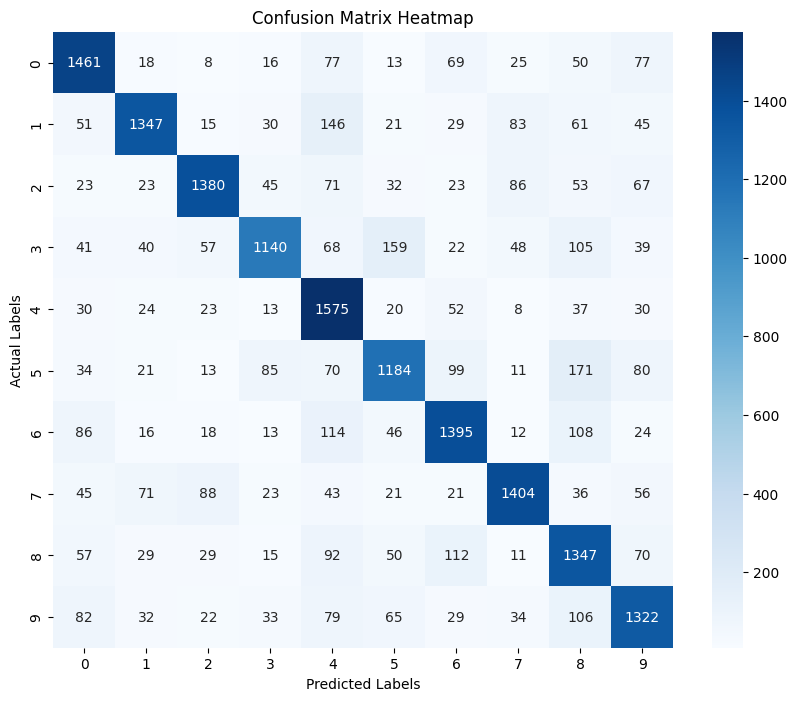

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1814
           1       0.83      0.74      0.78      1828
           2       0.83      0.77      0.80      1803
           3       0.81      0.66      0.73      1719
           4       0.67      0.87      0.76      1812
           5       0.73      0.67      0.70      1768
           6       0.75      0.76      0.76      1832
           7       0.82      0.78      0.80      1808
           8       0.65      0.74      0.69      1812
           9       0.73      0.73      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generating the classification report
class_report = classification_report(y_test, test_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


print(class_report) 


**Final Observations:**

Regarding the confusion matrix, the diagonal cells which represent correct predictions for each digit, have high values. This suggests that the model is performing well overall, correctly identifying the majority of the digits. The most important errors are in particular for three digits: 
-   '1' has been confused with '4' (146 instances). 
-   '3' has been confused with '5' (159 instances).
-   '5' has been confused with '8' (171 instances). 

In this dataset there could be effect of class imbalance for some digits, this could be affect the model performance.  
The digits above might benefit from further data augmentation or model tuning in order to mitigate the missclassification rate. 

Regarding the classification report, the model achieves an overall accuracy of 75%, which indicates a good level of prediction for the classification task with 10 classes. 
The model has the highest precision for classifying digit '7' (0.82) and lowest precision for digit '8' (0.65). Higher precision indicates a lower false positive rate, meaning that digit '7' has fewer instances of being falsely identified, while digit '8' is more often incorrectly predicted as another digit. 
The report shows the highest recall for digit '4' (0.87) and the lowest for digit '3'(0.66). Higher recall means a lower false negative rate, so digit '4' is more often correctly identified, while digit '3' is more frequently missed. 
F1-Score is highest for digit '2' and '7' (0.80) and lowest for digit '8' (0.69). Digit '2' and '7' are well balanced in terms of precision and recall, while digit '8' is the least balanced, indicating that digit '8' could be particularly challenging for the model to classify accurately. 



## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [28]:
# Load the .h5 file
with h5py.File('SVHN_single_grey1.h5', 'r') as file:
    # Assuming you have 'features' and 'labels' in your .h5 file

    X_train = file['X_train'][:]
    y_train = file['y_train'][:]

    X_test = file['X_test'][:]
    y_test = file['y_test'][:]


Check the number of images in the training and the testing dataset.

In [29]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32) (42000,)
Test set: (18000, 32, 32) (18000,)


**Observation:**

The number of images in the training dataset is 42000.

The number of images in the test dataset is 18000

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [30]:
# Print the shape of the first image
print("Shape of the first image:", X_train[0].shape)

Shape of the first image: (32, 32)


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [31]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [34]:
# Normalize the datasets by dividing by 255
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

# Verify normalization by checking the max value in the normalized arrays
max_value_train_normalized = X_train_normalized.max()
max_value_test_normalized = X_test_normalized.max() 

max_value_train_normalized, max_value_test_normalized 

(0.9999, 0.9999)

Print New shape of Training and Test

In [35]:
print('Training set:', X_train_normalized.shape, y_train.shape)

print('Test set:', X_test_normalized.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [36]:
# One-hot encode output

y_train_encoded = to_categorical(y_train)

y_test_encoded = to_categorical(y_test)

**Observation:**

Each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [38]:
# Clearing backend

from tensorflow.python.keras import backend

backend.clear_session()

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [42]:

def cnn_model_1():
    model = Sequential()
    
    # Input Layer
    model.add(Input(shape=(32, 32, 1)))  

    # First Convolutional layer
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))       
    model.add(LeakyReLU(negative_slope=0.1))                                  
    
    # Second Convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))   
    model.add(LeakyReLU(negative_slope=0.1))                                  
    
    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))                       
    
    # Flatten the output
    model.add(Flatten())                                           
    
    # Dense layer with 32 nodes
    model.add(Dense(32))                                             
    model.add(LeakyReLU(negative_slope=0.1))
    
    # Output layer with 10 nodes (number of classes) and softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    return model

# Call the function and store the output in a new variable
cnn_model = cnn_model_1()

# Print the summary of the model
cnn_model.summary()


history_cnn = cnn_model.fit(X_train_normalized, y_train_encoded, validation_split=0.2, 
                        batch_size=32, 
                        verbose=1, epochs=20)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4100 - loss: 1.6594 - val_accuracy: 0.8099 - val_loss: 0.6485
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8330 - loss: 0.5682 - val_accuracy: 0.8377 - val_loss: 0.5662
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8639 - loss: 0.4686 - val_accuracy: 0.8539 - val_loss: 0.5217
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8810 - loss: 0.4042 - val_accuracy: 0.8618 - val_loss: 0.5044
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8958 - loss: 0.3549 - val_accuracy: 0.8673 - val_loss: 0.5028
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9071 - loss: 0.3142 - val_accuracy: 0.8701 - val_loss: 0.5077
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9171 - loss: 0.2822 - val_accuracy: 0.8690 - val_loss: 0.5250
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9263 - loss: 

### **Plot the Training and Validation Accuracies and Write your observations.**

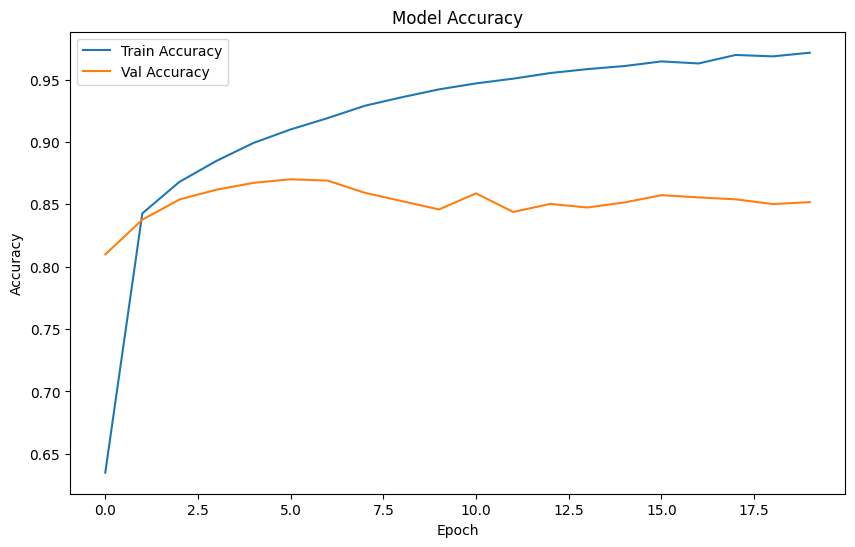

In [43]:
# Plotting the accuracies for model 2 

plt.figure(figsize=(10, 6))
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Observations:** 

The plow above shows the training accuracy increasing sharply reaching a value around 95%. This indicates that the model is effectively learning from the training data. 

The validation accuracy quickly plateaus around 85% and does not improve much as the epochs increase. This suggests that while the model has learned the training data well, it may not be generalizing equally well to new, unseen data. 
A large gap between training and validation accuracy is clearly visible and it indicates that the model may be overfitting the training data. 
Given that the validation accuracy does not significantly improve after a few epochs, an early stopping technique could be implemented to stop training when the validation accuracy does not improve for a set number of epochs. This can save computational resources and prevent the model from overfitting. 

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [44]:
# Clearing backend

from tensorflow.python.keras import backend

backend.clear_session()

# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [46]:

def cnn_model_2():
    model = Sequential()

    # Input layer 
    model.add(Input(shape=(32, 32, 1)))
    # First Convolutional layer
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(negative_slope=0.1))
    
    # Second Convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(negative_slope=0.1))
    
    # First max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # First BatchNormalization layer
    model.add(BatchNormalization())
    
    # Third Convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(negative_slope=0.1))
    
    # Fourth Convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(negative_slope=0.1))
    
    # Second max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second BatchNormalization layer
    model.add(BatchNormalization())
    
    # Flatten the output
    model.add(Flatten())
    
    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(negative_slope=0.1))
    
    # Dropout layer
    model.add(Dropout(0.5))
    
    # Output layer with 10 nodes (number of classes) and softmax activation
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    return model

# Call the function and store the output in a new variable
cnn_model_2_instance = cnn_model_2()

# Print the summary of the model
cnn_model_2_instance.summary()


history_cnn_2 = cnn_model_2_instance.fit(X_train_normalized, y_train_encoded, 
                                   validation_split=0.2, 
                                   batch_size=128, 
                                   verbose=1, 
                                   epochs=30)




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.3076 - loss: 2.0121 - val_accuracy: 0.4188 - val_loss: 1.6869
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.7797 - loss: 0.7171 - val_accuracy: 0.8570 - val_loss: 0.4980
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.8275 - loss: 0.5651 - val_accuracy: 0.8393 - val_loss: 0.5301
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8498 - loss: 0.5000 - val_accuracy: 0.8825 - val_loss: 0.4025
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8670 - loss: 0.4376 - val_accuracy: 0.8964 - val_loss: 0.3785
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.8767 - loss: 0.4033 - val_accuracy: 0.8970 - val_loss: 0.3675
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.8858 - loss: 0.3771 - val_accuracy: 0.8779 - val_loss: 0.4356
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.8911 - loss: 0.3456 - 

### **Plot the Training and Validation accuracies and write your observations.**

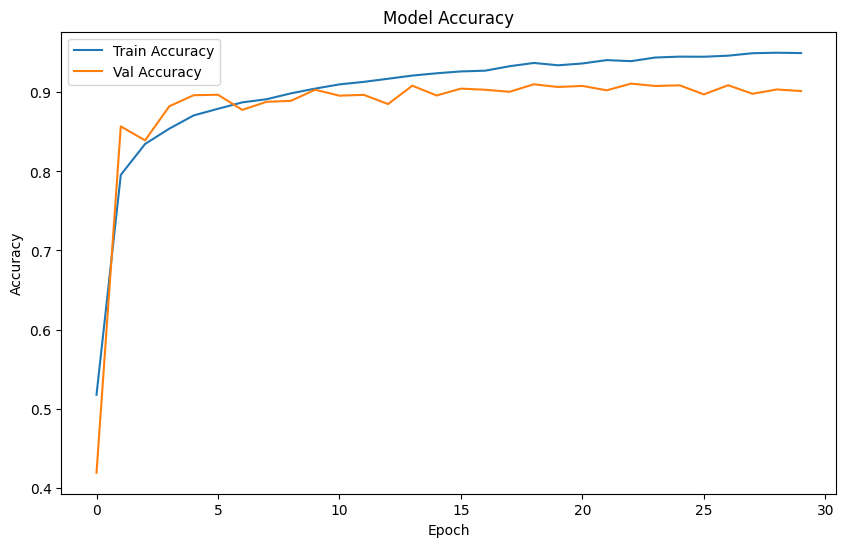

In [47]:
# Plotting the accuracies for model 2 

plt.figure(figsize=(10, 6))
plt.plot(history_cnn_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Observations:** 

The plot above shows a good generalization. The gap between the training accuracy and validation accuracy is narrow, indicating that the model is generalizing well. This suggests that the features learned by the model are applicable to unseen data, reducing the possibility of overfitting. Both accuracies plateau after an initial rise and the stablity in the validation accuracy, without significant fluctuations. This suggests that the model is stable. The accuracy reached from both training and validation accuracies is high (above 90%), which indicates a successfull model architecture for this task. It is observable a minor improvements in validation accuracy. An early stopping mechanism could be beneficial to stop training when the validation score does not improve for a defined number of epochs, saving computational resources and potentially preventing overfitting. As last consideration, the use of techniques such as BatchNormalization and Dropout likely contributed to the model's good generalization capabilities. 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [48]:
test_pred = cnn_model_2_instance.predict(X_test_normalized)

test_pred = np.argmax(test_pred, axis = -1)


563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [49]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test_encoded, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

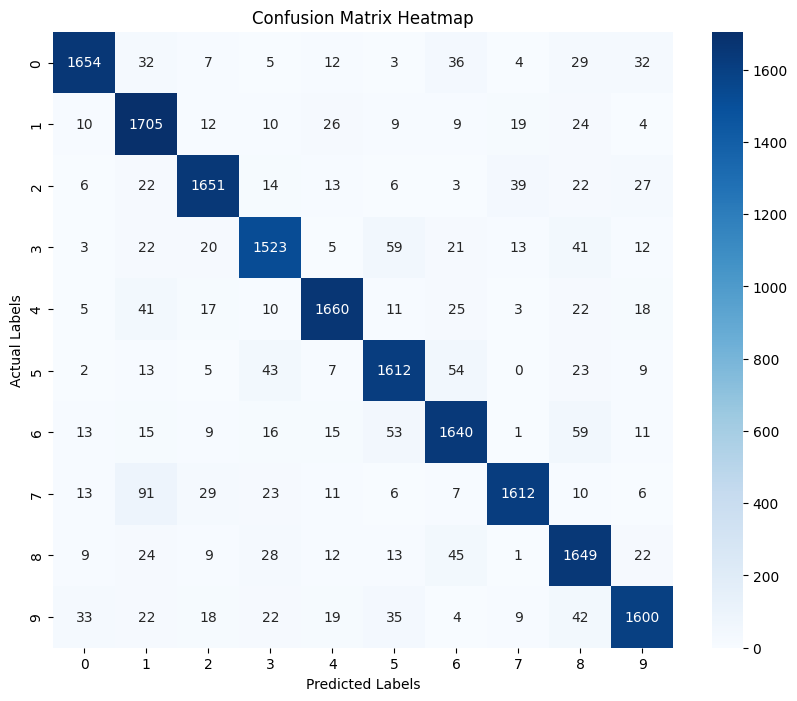

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1814
           1       0.86      0.93      0.89      1828
           2       0.93      0.92      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.89      0.91      0.90      1768
           6       0.89      0.90      0.89      1832
           7       0.95      0.89      0.92      1808
           8       0.86      0.91      0.88      1812
           9       0.92      0.89      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [51]:
# Generating the classification report
class_report = classification_report(y_test, test_pred)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


print(class_report) 

**Final Observations:**

The confusion matrix shows high diagonal values which represent correct predictions across all digits. This indicates that the model performs well for most classes. 
Digit '7' has been occasionally confused with '1', likely due to similar vertical strokes. 
Digits '3', '5', and '8' have some confusion among them, which might be due to similar round shapes. 
From the classification report, it is clear that the model has the highest precision for digit '0' and '7' (0.95) which means that when the model predicts a '0', it is correct 95% of the time and for digit '7' as well, and the lowest for digit '1' and '8' (0.86), may be influenced by some confusion with similar looking digits like '4' and '6' respectively.
The highest recall is for digit '1' (0.93), indicating that '1' is correctly identified 93% of the time from all actual '1'. 
The lowest recall is for '7', '9' and '3' (0.89), suggesting that these digits are sometimes missed or confused with other digits. 
F1-scores are consistent and high across all digits, indicating a balanced performance between precisio and recall. 

Concluding, this model demonstrates very good performance as the classification report shows. The confusion matrix corroborates these findings, showing that the model correctly identifies most of digits with few misclassifications. The confusion that does occur tends to be between digits with similar shapes or features. To furhter improve the model, focusing on the feature extraction for the less distinguishable digits could help reduce these specific confusions. 